# Задание 5.
Восстановление картинки

In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import pandas as pd
import scipy.stats as st
import seaborn as sns

Сначала посмотрим на изначальную картинку, чтобы понимать, что будет в конце.

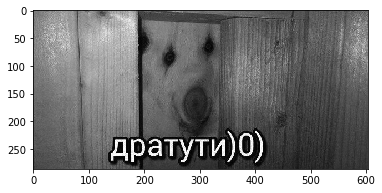

In [62]:
plt.imshow(np.load('regression_y_train.npy')*255, cmap='gray')

Напишем вспомогательные функции для преобразования массивов из трехмерных в двумерные и обратно.

In [12]:
def line(X):
    X_lin = []
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            X_lin.append(X[i, j])
    return np.array(X_lin)
def retu(X_lin, shape):
    X = []
    k = 0
    for i in range(shape[0]):
        X.append([])
        for j in range(shape[1]):
            X[i].append(X_lin[k])
            k += 1
    return np.array(X)

Загружаем и преобразуем датасеты.

In [50]:
x_train = np.load('regression_x_train.npy')
y_train = np.load('regression_y_train.npy')
x_test = np.load('regression_x_test.npy')

In [51]:
X_lin = line(x_train)
Y_lin = line(y_train)
x_lin = line(x_test)

Попробуем линейную регрессию для непреобразованных данных.

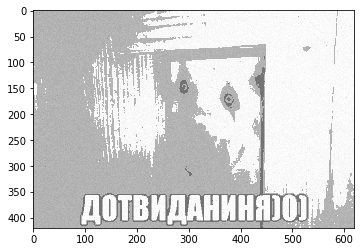

In [64]:
from statsmodels.regression.linear_model import OLS
model = OLS(Y_lin, X_lin).fit()
model.summary2()
pred = model.predict(x_lin)*255
plt.imshow(retu(pred, x_test.shape), cmap='gray')
plt.show()

Очертания картинки уже дают понять, что должно получяиться в конце, однако качество получилось так себе.
Попробуем убрать сильно коррелирующие признаки:

In [158]:
corr = np.corrcoef(X_lin.transpose())
izgoi = []
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[1]):
        if np.abs(corr[i, j]) >= 0.8 and i != j and j not in izgoi:
            izgoi.append(j)
norm = []
for i in range(0, 35):
    if i not in izgoi:
        norm.append(i)
print(len(norm))
X_lin_less = X_lin[:, norm]

5


In [159]:
from statsmodels.regression.linear_model import OLS
model2 = OLS(Y_lin, X_lin_less).fit()
model2.summary2()


<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Ordinary least squares
=====================================================================
Model:              OLS              Adj. R-squared:     0.679       
Dependent Variable: y                AIC:                -449481.6572
Date:               2019-04-27 23:14 BIC:                -449431.3594
No. Observations:   172744           Log-Likelihood:     2.2475e+05  
Df Model:           4                F-statistic:        9.121e+04   
Df Residuals:       172739           Prob (F-statistic): 0.00        
R-squared:          0.679            Scale:              0.0043398   
------------------------------------------------------------------------
         Coef.     Std.Err.        t        P>|t|      [0.025     0.975]
------------------------------------------------------------------------
x1      -0.3005      0.0009    -345.5724    0.0000    -0.3022    -0.2988
x2      -0.1608      0.0004    -392.6160    0.0000    -0.1616    -0.1600
x3       0.0142      0.0004      37.9092    0.0000     0.0135     0.0150
x4       0.0087      0.0004      22.7743    0.0000     0.0080     0.0095
x5      -1.3134      0.0020    -672.7287    0.0000    -1.3173    -1.3096
---------------------------------------------------------------------
Omnibus:             40932.087      Durbin-Watson:         0.621     
Prob(Omnibus):       0.000          Jarque-Bera (JB):      122965.281
Skew:                1.229          Prob(JB):              0.000     
Kurtosis:            6.322          Condition No.:         33        
=====================================================================

"""

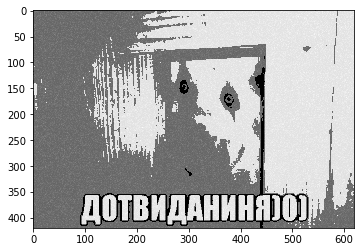

In [160]:
pred2 = model2.predict(x_lin[:, norm])*255
plt.imshow(retu(pred2, x_test.shape), cmap='gray')
plt.show()

Результат изменился не сильно, хотя по ощущениям и стало немного лучше, но сказать сложно. Тем не менее, удивительно, насколько все портится, когда убирается признак, являющийся константой:

                   Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.959       
Dependent Variable: y                AIC:                -227256.3819
Date:               2019-04-27 23:49 BIC:                -227216.1436
No. Observations:   172744           Log-Likelihood:     1.1363e+05  
Df Model:           4                F-statistic:        1.001e+06   
Df Residuals:       172740           Prob (F-statistic): 0.00        
R-squared:          0.959            Scale:              0.015710    
------------------------------------------------------------------------
         Coef.     Std.Err.        t        P>|t|      [0.025     0.975]
------------------------------------------------------------------------
x1       0.1222      0.0011     106.7782    0.0000     0.1199     0.1244
x2      -0.0753      0.0007    -101.6173    0.0000    -0.0767    -0.0738
x3       0.2338      0.0004     659.9241    0.0000     0.2331     0.2345
x4       0.0817      

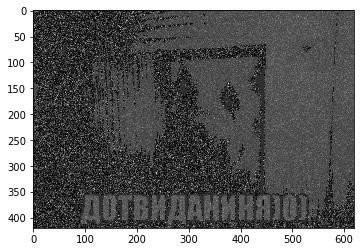

In [208]:
from statsmodels.regression.linear_model import OLS
i = 1
model2 = OLS(Y_lin, X_lin_less[:, :4]).fit()
print(model2.summary2())

pred2 = model2.predict(x_lin[:, norm[:4]])*255
plt.imshow(retu(pred2, x_test.shape), cmap='gray')
plt.show()

In [202]:
k = 0
j = 0
l = 0
y = []
for i in range(X_lin_less[:, 0].shape[0]):
    if Y_lin[i] >= ma:
        j += 1
    if Y_lin[i] <= mi:
        l += 1
    if X_lin_less[i, 0] != X_lin_less[0, 0]:
        k += 1
        y.append(Y_lin[i])
print(k, j, l)
ma = np.amax(np.array(y))
mi = np.amin(np.array(y))

8347 163521 1


In [210]:
print(mi , ma)

0.35874881336122416 0.41633493814679146


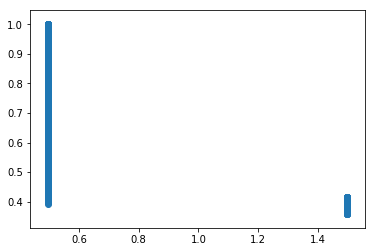

In [214]:
plt.scatter(X_lin_less[:, 0], Y_lin)

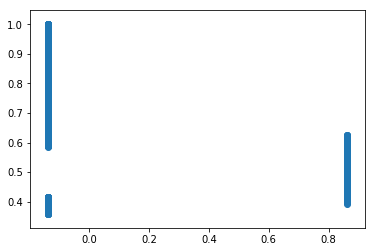

In [215]:
plt.scatter(X_lin_less[:, 1], Y_lin)

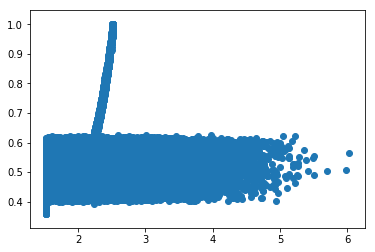

In [216]:
plt.scatter(X_lin_less[:, 2], Y_lin)

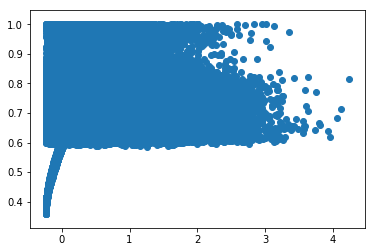

In [217]:
plt.scatter(X_lin_less[:, 3], Y_lin)

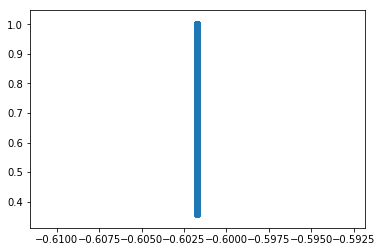

In [218]:
plt.scatter(X_lin_less[:, 4], Y_lin)

Таким образом, признаки 0 и 1 можно проинтерпретировать, как зашумленное попадание в некоторый интервал, а признаки 2 и 3 дают нелинейную зависимость, но только при y в определенных границах.